![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 1 - Hearth disease classification</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/MainHeart_01.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

#### Load the dataset:
https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
dData = pd.read_csv('heart.csv')
dData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Rename columns:

In [4]:
dData.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_blood_pressure', 'Cholesterol', 'Fasting_blood_sugar', 'Rest_ECG', 'Max_heart_rate_achieved',
                 'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Num_major_vessels', 'Thalassemia', 'Target']
dData

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate_achieved,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Meaningful categorical data:

In [5]:
dData.loc[dData['Sex']                     == 0, 'Sex']                     = 'female'
dData.loc[dData['Sex']                     == 1, 'Sex']                     = 'male'
        
dData.loc[dData['Chest_pain_type']         == 1, 'Chest_pain_type']         = 'typical angina'
dData.loc[dData['Chest_pain_type']         == 2, 'Chest_pain_type']         = 'atypical angina'
dData.loc[dData['Chest_pain_type']         == 3, 'Chest_pain_type']         = 'non-anginal pain'
dData.loc[dData['Chest_pain_type']         == 4, 'Chest_pain_type']         = 'asymptomatic'

dData.loc[dData['Fasting_blood_sugar']     == 0, 'Fasting_blood_sugar']     = 'lower than 120mg/ml'
dData.loc[dData['Fasting_blood_sugar']     == 1, 'Fasting_blood_sugar']     = 'greater than 120mg/ml'

dData.loc[dData['Rest_ECG']                == 0, 'Rest_ECG']                = 'normal'
dData.loc[dData['Rest_ECG']                == 1, 'Rest_ECG']                = 'ST-T wave abnormality'
dData.loc[dData['Rest_ECG']                == 2, 'Rest_ECG']                = 'left ventricular hypertrophy'

dData.loc[dData['Exercise_induced_angina'] == 0, 'Exercise_induced_angina'] = 'no'
dData.loc[dData['Exercise_induced_angina'] == 1, 'Exercise_induced_angina'] = 'yes'

dData.loc[dData['ST_slope']                == 1, 'ST_slope']                = 'upsloping'
dData.loc[dData['ST_slope']                == 2, 'ST_slope']                = 'flat'
dData.loc[dData['ST_slope']                == 3, 'ST_slope']                = 'downsloping'

dData.loc[dData['Thalassemia']             == 1, 'Thalassemia']             = 'normal'
dData.loc[dData['Thalassemia']             == 2, 'Thalassemia']             = 'fixed defect'
dData.loc[dData['Thalassemia']             == 3, 'Thalassemia']             = 'reversable defect'

dData.loc[dData['Target']                  == 0, 'Target']                  = 'hearth disease'
dData.loc[dData['Target']                  == 1, 'Target']                  = 'no hearth disease'
dData


,Age,Sex,Chest_pain_type,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate_achieved,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thalassemia,Target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,no hearth disease
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,no hearth disease
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,no hearth disease
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,no hearth disease
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,no hearth disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,upsloping,0,reversable defect,hearth disease
299,45,male,non-anginal pain,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,upsloping,0,reversable defect,hearth disease
300,68,male,0,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,upsloping,2,reversable defect,hearth disease
301,57,male,0,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,upsloping,1,reversable defect,hearth disease


In [6]:
dData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    object 
 2   Chest_pain_type          303 non-null    object 
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    object 
 6   Rest_ECG                 303 non-null    object 
 7   Max_heart_rate_achieved  303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    object 
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    object 
 11  Num_major_vessels        303 non-null    int64  
 12  Thalassemia              303 non-null    object 
 13  Target                   303 non-null    object 
dtypes: float64(1), int64(5), o

In [7]:
dData = pd.get_dummies(dData, drop_first=True)
dData

,Age,Resting_blood_pressure,Cholesterol,Max_heart_rate_achieved,ST_depression,Num_major_vessels,Sex_male,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,Fasting_blood_sugar_lower than 120mg/ml,Rest_ECG_left ventricular hypertrophy,Rest_ECG_normal,Exercise_induced_angina_yes,ST_slope_flat,ST_slope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect,Target_no hearth disease
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
299,45,110,264,132,1.2,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0


#### Pair plot:

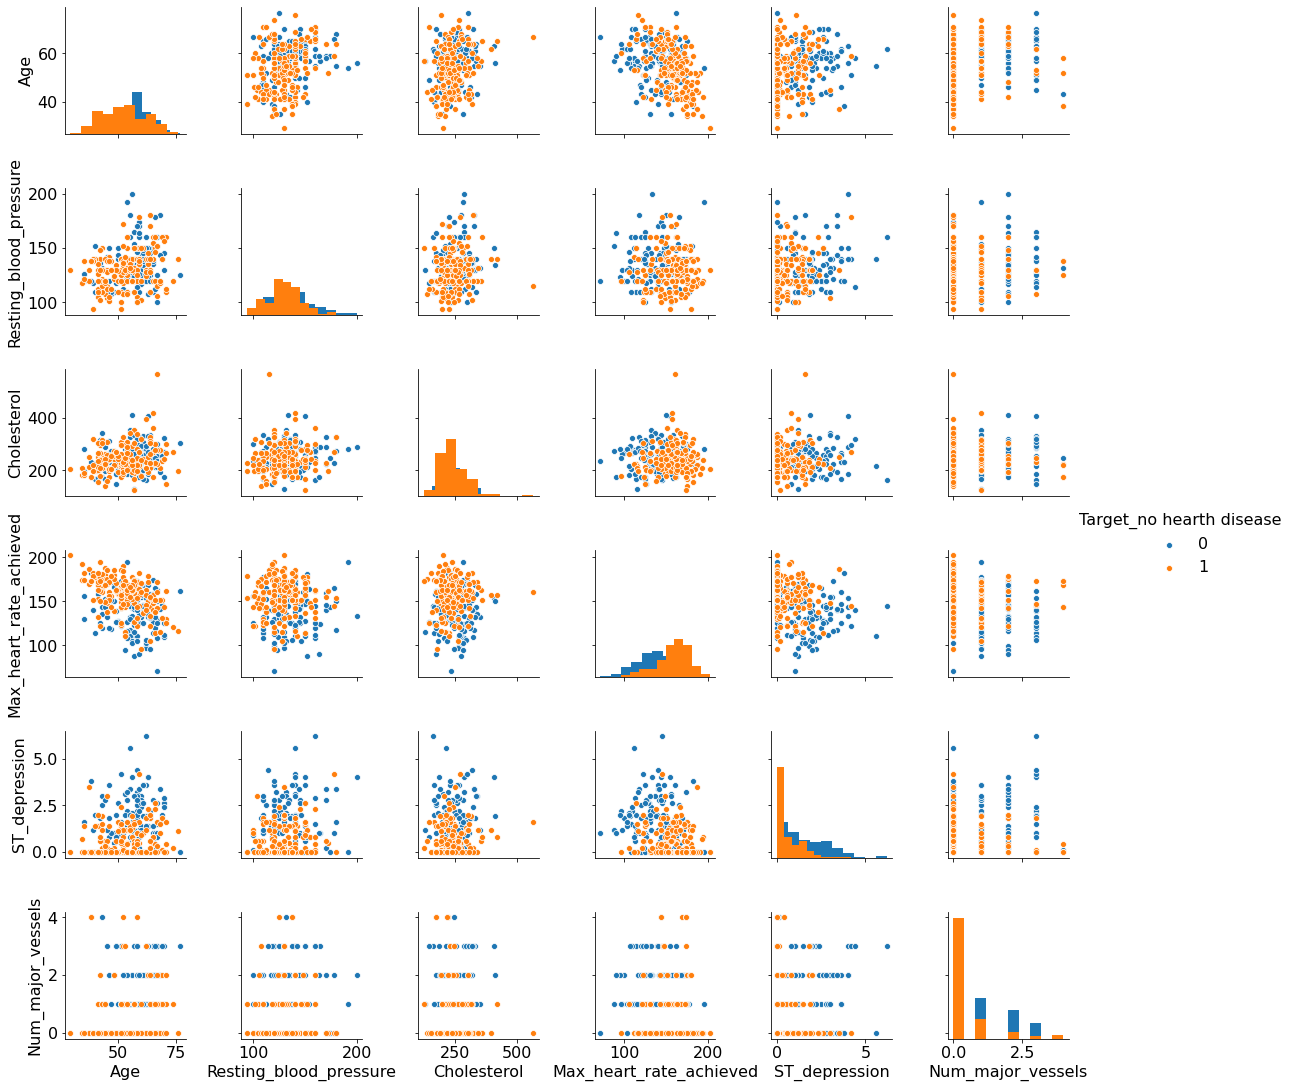

In [8]:
lColumn = ['Age', 'Resting_blood_pressure', 'Cholesterol', 'Max_heart_rate_achieved', 'ST_depression', 'Num_major_vessels', 'Target_no hearth disease']
sns.pairplot(dData[lColumn], hue='Target_no hearth disease', diag_kind='hist')

#### Display data balance:

In [9]:
 dData['Target_no hearth disease'].value_counts()

1    165
0    138
Name: Target_no hearth disease, dtype: int64

#### Split to features and labels:

In [10]:
dTrain = dData.drop('Target_no hearth disease', 1)
dY     = dData['Target_no hearth disease']

#### Train linear SVM:

In [11]:
from sklearn.svm             import SVC
from sklearn.model_selection import cross_val_score

for C in [0.1, 0.5, 1, 2, 5]:
    oSVM      = SVC(kernel='linear', C=C)
    vAccuracy = cross_val_score(oSVM, dTrain, dY, cv=10)
    print(f'Linear SVM with C = {C:6.1f} | cross validation accuracy: {vAccuracy.mean():.4f}')

Linear SVM with C =    0.1 | cross validation accuracy: 0.8249
Linear SVM with C =    0.5 | cross validation accuracy: 0.8282
Linear SVM with C =    1.0 | cross validation accuracy: 0.8282
Linear SVM with C =    2.0 | cross validation accuracy: 0.8249
Linear SVM with C =    5.0 | cross validation accuracy: 0.8184


#### Normalize the data

In [12]:
dTrain.describe()

,Age,Resting_blood_pressure,Cholesterol,Max_heart_rate_achieved,ST_depression,Num_major_vessels,Sex_male,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,Fasting_blood_sugar_lower than 120mg/ml,Rest_ECG_left ventricular hypertrophy,Rest_ECG_normal,Exercise_induced_angina_yes,ST_slope_flat,ST_slope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.683168,0.287129,0.075908,0.165017,0.851485,0.013201,0.485149,0.326733,0.468647,0.462046,0.547855,0.059406,0.386139
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.466011,0.453171,0.265288,0.371809,0.356198,0.114325,0.500606,0.469794,0.499842,0.499382,0.498528,0.236774,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn import preprocessing

dTrain = pd.DataFrame(preprocessing.StandardScaler().fit_transform(dTrain), columns=dTrain.columns)
dTrain.describe()

,Age,Resting_blood_pressure,Cholesterol,Max_heart_rate_achieved,ST_depression,Num_major_vessels,Sex_male,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,Fasting_blood_sugar_lower than 120mg/ml,Rest_ECG_left ventricular hypertrophy,Rest_ECG_normal,Exercise_induced_angina_yes,ST_slope_flat,ST_slope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16,4.752341e-16,-1.319077e-17,3.341661e-16,1.183505e-16,-3.297692e-16,3.444256e-17,8.143468e-17,1.634190e-16,-5.203025e-16,2.147164e-16,-8.896441e-16,6.020120e-16,-1.282436e-17,4.125779e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,-7.144289e-01,-1.468418e+00,-6.346478e-01,-2.866058e-01,-4.445542e-01,-2.394438e+00,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,-1.100763e+00,-2.513123e-01,-7.931155e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,-7.144289e-01,-1.468418e+00,-6.346478e-01,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,-1.100763e+00,-2.513123e-01,-7.931155e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,-7.144289e-01,6.810052e-01,-6.346478e-01,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,9.084609e-01,-2.513123e-01,-7.931155e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,2.650822e-01,6.810052e-01,1.575677e+00,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,1.030158e+00,1.435481e+00,1.064802e+00,1.079021e+00,9.084609e-01,-2.513123e-01,1.260850e+00
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,3.203615e+00,6.810052e-01,1.575677e+00,3.489114e+00,2.249444e+00,4.176345e-01,8.645808e+00,1.030158e+00,1.435481e+00,1.064802e+00,1.079021e+00,9.084609e-01,3.979112e+00,1.260850e+00


#### Train kernel SVM (Gaussian kernel):

In [14]:
lC   = [1, 10, 100, 1000, 5000]
lσ   = [0.01, 0.1, 1, 10, 100]
dRes = pd.DataFrame(columns=['C', 'σ', 'Accuracy'])

for C in lC:
    for σ in lσ:
        oSVM                = SVC(kernel='rbf', C=C, gamma=1/(2*σ**2))
        vAccuracy           = cross_val_score(oSVM, dTrain, dY, cv=10)
        dRes.loc[len(dRes)] = [C, σ, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,σ,Accuracy
19,1000.0,100.00,0.841505
13,100.0,10.00,0.838065
3,1.0,10.00,0.834839
8,10.0,10.00,0.834839
14,100.0,100.00,0.834839
24,5000.0,100.00,0.825054
9,10.0,100.00,0.815054
18,1000.0,10.00,0.781935
23,5000.0,10.00,0.762043
22,5000.0,1.00,0.672688


#### Train kernel SVM (polynomial kernel):

In [15]:
lC   = [1, 10, 100, 1000]
lP   = range(1, 9)
dRes = pd.DataFrame(columns=['C', 'P', 'Accuracy'])

for C in lC:
    for P in lP:
        oSVM                = SVC(kernel='poly', C=C, degree=P)
        vAccuracy           = cross_val_score(oSVM, dTrain, dY, cv=10)
        dRes.loc[len(dRes)] = [C, P, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

,C,P,Accuracy
0,1.0,1.0,0.838065
2,1.0,3.0,0.825269
8,10.0,1.0,0.825054
24,1000.0,1.0,0.821613
16,100.0,1.0,0.821613
12,10.0,5.0,0.795699
10,10.0,3.0,0.795591
18,100.0,3.0,0.778710
26,1000.0,3.0,0.778710
20,100.0,5.0,0.772258


#### Train K-NN:

In [16]:
from sklearn.neighbors import KNeighborsClassifier

for K in range(1, 9):
    oKnn   = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(oKnn, dTrain, dY, cv=10)
    print(f'K-nn with K = {K:2d} | cross validation accuracy: {scores.mean():.4f}')

K-nn with K =  1 | cross validation accuracy: 0.7657
K-nn with K =  2 | cross validation accuracy: 0.7691
K-nn with K =  3 | cross validation accuracy: 0.7892
K-nn with K =  4 | cross validation accuracy: 0.7889
K-nn with K =  5 | cross validation accuracy: 0.8122
K-nn with K =  6 | cross validation accuracy: 0.8056
K-nn with K =  7 | cross validation accuracy: 0.8219
K-nn with K =  8 | cross validation accuracy: 0.8186


#### Take best model and plot confusion matrix (using cross validation):

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics         import confusion_matrix

oSVM            = SVC(kernel='rbf', C=1000, gamma=1/(2*100**2))
vCrossValHatY   = cross_val_predict(oSVM, dTrain, dY, cv=10)
mTrainConfusion = confusion_matrix(dY, vCrossValHatY)
mTrainConfusion

array([[107,  31],
       [ 17, 148]], dtype=int64)

#### ELI5 (Explain Like I'm Five):
https://eli5.readthedocs.io/en/latest/index.html

In [18]:
import eli5

oSVM = SVC(kernel='linear', C=0.1).fit(dTrain, dY)
eli5.show_weights(oSVM, feature_names=dTrain.columns.tolist(), target_names=['hearth disease', 'no hearth disease'], )

C:\Users\Or\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Or\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+0.498,Chest_pain_type_atypical angina
+0.355,Chest_pain_type_non-anginal pain
+0.347,Thalassemia_fixed defect
+0.210,ST_slope_flat
+0.175,Chest_pain_type_typical angina
+0.174,Max_heart_rate_achieved
+0.174,<BIAS>
+0.128,Thalassemia_normal
+0.000,Rest_ECG_left ventricular hypertrophy
-0.021,Age


#### Single prediction inspection:

In [19]:
eli5.show_prediction(oSVM, dTrain.iloc[2], target_names=['hearth disease', 'no hearth disease'])

### SHAP (SHapley Additive exPlanations):
https://shap.readthedocs.io/en/latest/#

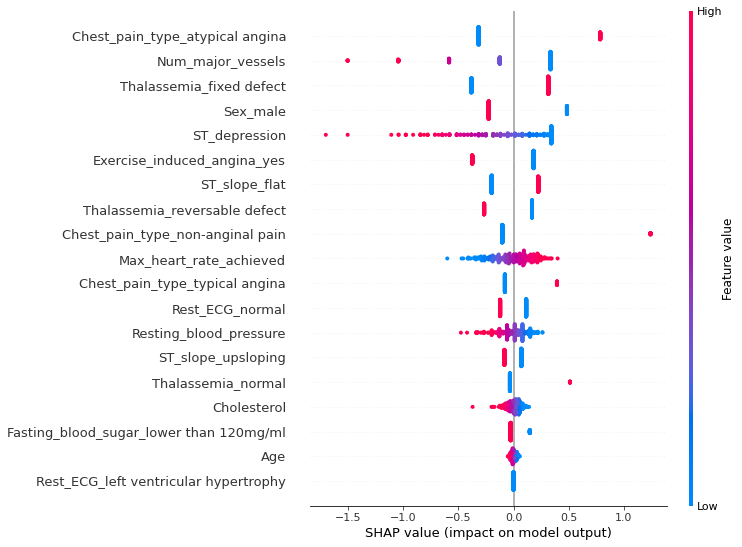

In [20]:
import shap

oExplainer  = shap.LinearExplainer(oSVM, dTrain)
mShapValues = oExplainer.shap_values(dTrain)
shap.summary_plot(mShapValues, dTrain)